In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split,learning_curve, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR



In [2]:
df= pd.read_csv('../csv/after_cleaning/mubawab_preprocessed.csv')
df.head()

,delegation,superficie,chambres,salle_de_bains,etat,etage,gouvernorat_ariana,gouvernorat_ben-arous,gouvernorat_la-manouba,gouvernorat_tunis,prix
0,26.0,88,2,1,9,1,0.0,0.0,0.0,1.0,340000.0
1,23.0,100,2,1,9,1,0.0,0.0,0.0,1.0,135000.0
2,36.0,152,2,1,9,1,0.0,0.0,0.0,1.0,680000.0
3,36.0,120,1,1,9,1,0.0,0.0,0.0,1.0,470000.0
4,31.0,145,3,1,11,4,0.0,0.0,0.0,1.0,260000.0


**scaling and train test split**

In [3]:
X= df.drop(columns='prix')

y= df['prix']


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaler to the test data (do not fit again!)
X_test_scaled = scaler.transform(X_test)


# Support Vector Regression

Support Vector regression is a type of Support vector machine that supports linear and non-linear regression. 

As it seems in the below graph, the mission is to fit as many instances as possible between the lines while limiting the margin violations.

**most important SVR parameter is Kernel type. It can be :
linear,rbf, polynomial or sigmoid.**

RBF kernel:

Default choice for non-linear problems in SVMs.

Captures complex relationships without prior knowledge of data.

Sensitive to hyperparameter tuning, especially gamma.


In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = {
    'C': [1e3, 1e4, 1e5, 1e6],  
    'gamma': [0.001, 0.01, 0.1, 0.5, 1],  
    'epsilon': [0.01, 0.1, 0.2, 0.5]  
}

svr = SVR(kernel='rbf')
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 1000000.0, 'epsilon': 0.5, 'gamma': 0.1}


In [51]:
regressor = SVR(kernel='rbf', **grid_search.best_params_)
regressor.fit(X_train_scaled,y_train)

y_hat= regressor.predict(X_test_scaled)

In [52]:
mae = mean_absolute_error(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mean_squared_error(y_test, y_hat))
mape=mean_absolute_percentage_error(y_test, y_hat)
r2= r2_score(y_test, y_hat)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"R²: {r2}")

Mean Absolute Error (MAE): 106063.66398384055
Root Mean Squared Error (RMSE): 188361.64728725865
Mean Squared Error (MSE): 35480110168.76963
Mean Absolute Percentage Error (MAPE): 0.2451769024735367
R²: 0.6710939620248887


**R² is around 67% , this means that LR model explains about 67% of the variance in apartment prices.
The higher the R², the better the model’s fit to the data.**

**learning curve**

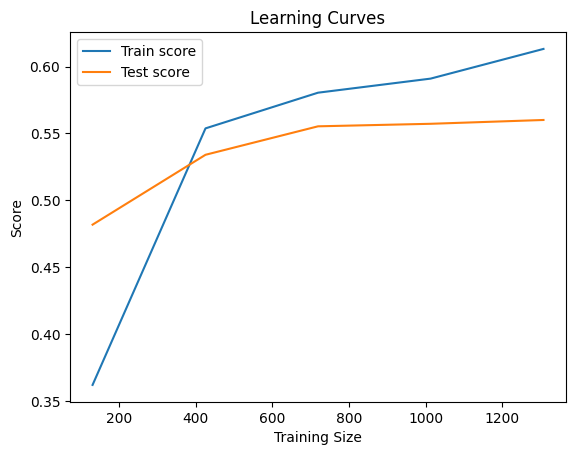

In [57]:

train_sizes, train_scores, test_scores = learning_curve(regressor, X_train_scaled, y_train, cv=5)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test score')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend()
plt.show()
